In [ ]:
import sys
sys.path.append("..")
# sys.path.append("..")

In [ ]:
from matplotlib import cm,use
import math
import time
from pupil_analysis_func import Main, get_fig_mosaic
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import analysis_utils as utils
from copy import deepcopy as copy
from behaviour_analysis import TDAnalysis
import math
import pickle
from datetime import datetime, timedelta
from scipy.signal import find_peaks, find_peaks_cwt
from pupil_analysis_func import batch_analysis, plot_traces, get_subset, glm_from_baseline
from pathlib import Path

In [ ]:
pkldir = Path(r'D:\bonsai\offline_data')
pkl2use = os.path.join(pkldir,'mouse_hf_fam_2d_90Hz_hpass00_lpass4hanning015_TOM.pkl')
run = Main(pkl2use, (-1.0, 3.0), figdir=rf'figures',fig_ow=False)
pmetric2use = ['diameter_2d_zscored','dlc_radii_a_zscored','dlc_EW_zscored','dlc_EW_normed']
for sess in run.data:
    run.data[sess].trialData['Offset'] = run.data[sess].trialData['Offset'].astype(float) + 0.0


In [ ]:
condition_keys = ['p_rate', 'p_rate_ctrl', 'p_onset', 'alt_rand', 'alt_rand_ctrl', 'pat_nonpatt_2X', 'p_rate_fm','p_rate_local']

aligned_pklfile = pkldir/r'mouse_hf_2305_batch_no_canny_fam_hpass015.pkl'
aligned_ow = False
conditions_class = utils.PupilEventConditions()
list_cond_filts = conditions_class.all_filts
stages = [3]

if os.path.isfile(aligned_pklfile) and aligned_ow is False:
    with open(aligned_pklfile,'rb') as pklfile:
        run.aligned = pickle.load(pklfile)

        keys = [[e] for e in run.aligned.keys()]
else:
    conditions_class.get_condition_dict(run, condition_keys,stages,)  # 'a1'
    # conditions_class.get_condition_dict(run, condition_keys, stages,
    #                                     pmetric2use='canny_raddi_a_zscored', key_suffix='_canny')

with open(aligned_pklfile, 'wb') as pklfile:
    pickle.dump(run.aligned,pklfile)

In [21]:
p_rate_dates= [
            '230531',
            '230601',
            '230602',
            '230605',
            '230606',
            '230607',
            # '230608',   # muscimol day (64, 69)
            '230609',
            '230717',
            '230718',
            # '230719',  # muscimol day 2 0.5 uL dose (64,69,70)
            '230720',
            '230721',
            '230724',
            '230725',
            # '230804',  # muscimol 1 ul/ul
            ]

length input lists 3


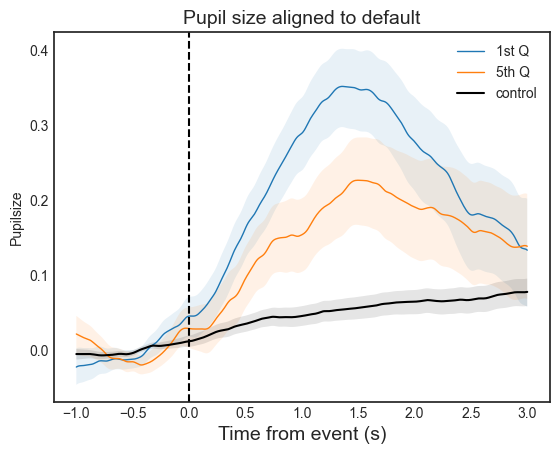

In [22]:

run.subsets['prate_rare_freq_2305'] = get_subset(run,run.aligned,'p_rate_local',{'date':p_rate_dates}, events=list_cond_filts['p_rate_local'][1],
                                                 exclude_idx=[1, 2, 3], ctrl_idx=3,alt_cond_names=['rare', 'frequent', 'none']
                                                    )

In [24]:
run.dump_trial_pupil_arr()

H:\gd_analysis\plotting_notebooks\..\pupil_analysis_func.py:834: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->axis0] [items->None]

  pd.DataFrame.to_hdf(pd.concat(dfs2dump,axis=0),filename,'df')
H:\gd_analysis\plotting_notebooks\..\pupil_analysis_func.py:834: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block0_items] [items->None]

  pd.DataFrame.to_hdf(pd.concat(dfs2dump,axis=0),filename,'df')
